In [1]:
import pandas as pd

In [67]:
df = pd.read_csv("netflix_titles_nov_2019.csv")
df.head(3)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie


In [68]:
df.shape

(5837, 12)

We have 5837 rows and 12 columns in our dataset<br>

## Exploring the Dataset<br>

In [70]:
print("Number of columns:")
print(len(df.columns))
print('-' * 100)
print('Name of each columns:\n')
print(df.columns)
print('-' * 100)
print('Data Type of Each Columns:\n')
print(df.dtypes)
print('-' * 100)
print('Missing Row Values in each column:\n')
print(df.isnull().sum())

Number of columns:
12
----------------------------------------------------------------------------------------------------
Name of each columns:

Index(['show_id', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'type'],
      dtype='object')
----------------------------------------------------------------------------------------------------
Data Type of Each Columns:

show_id          int64
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
type            object
dtype: object
----------------------------------------------------------------------------------------------------
Missing Row Values in each column:

show_id            0
title              0
director        1901
cast             556
country          427
date_added

## Data Cleaning <br>

Create a new column that shows the number of cast from the case column <br>

In [71]:
df['cast'][0]

'Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang Bu-ja, Lee Jae-ryong, Min Jin-woong, Kim Won-hae, Yoo Teo'

In [72]:
len(df['cast'][0].split(', '))
df['cast'][0].split(', ')

['Ha Ji-won',
 'Yoon Kye-sang',
 'Jang Seung-jo',
 'Kang Bu-ja',
 'Lee Jae-ryong',
 'Min Jin-woong',
 'Kim Won-hae',
 'Yoo Teo']

In [73]:
# let's see where the cast column has float type instead of string type

# filtering rows with null values in 'cast' column

#print(df[df['cast'].isna()]['cast'])

# now lets replace the null values with "Unknown" string in the "Cast" column
df["cast"].fillna("Unknown", inplace = True)
print(len(df[df['cast'].isna()]['cast']))

# so now we don't have any NaN values so all our data in 'cast' column is of string type

0


In [74]:
# Creating a list that stores the count of cast in the 'cast' column

empty = []
for i in df['cast']:
    #type(i)
    #print(i)
    #print(i.split(', '))
    #break
    empty.append(len(i.split(', ')))
empty[:10]

[8, 1, 8, 9, 10, 9, 6, 6, 12, 15]

In [75]:
# converting this list to a column of a data frame nameed as 'Number of Cast'

df['Number of Cast'] = empty
df.head(3)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,Number of Cast
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,8
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,1
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,8


In [76]:
# changing the order of columns

df = df.iloc[:,[0, 1, 2, 3, 12, 4, 5, 6, 7, 8, 9, 10, 11]]
df.head(3)

,show_id,title,director,cast,Number of Cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",8,South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,1,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",8,India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie


### We have 10 missing rows in rating column, replace them by the mode<br>

In [87]:
# now lets replace the null values in 'rating' column with mode value of the column

# mode value is
print(df['rating'].mode())

# add .mode()[0] as mode returns a series
df['rating'] = df["rating"].fillna(df['rating'].mode()[0])

print(len(df[df['rating'].isna()]['rating']))

0


## Let's remove duplicates

### show_id is meaningless so let's drop it<br>

In [90]:
df.drop(labels = ['show_id'], axis=1, inplace=True)

KeyError: "['show_id'] not found in axis"

In [91]:
df.head(2)`

,title,director,cast,Number of Cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",8,South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,1,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie


## convert the date_added column
For eg: November 30, 2019 to 11-30-2019<br>

In [97]:
# before doing this let's remove the NaN values in date_added column

df = df.dropna(subset=['date_added'])
df.shape

# we have dropped 642 rows

(5195, 12)

In [99]:
# testing with a sample

import re
months={
    'January':1,
    'February':2,
    'March':3,
    'April':4,
    'May':5,
    'June':6,
    'July':7,
    'August':8,
    'September':9,
    'October':10,
    'November':11,
    'December':12
}
date_lst=[]
for i in df['date_added'].values:
    print(i)
    str1=re.findall('([a-zA-Z]+)\s[0-9]+\,\s[0-9]+',i)
    print(str1)
    str2=re.findall('[a-zA-Z]+\s([0-9]+)\,\s[0-9]+',i)
    print(str2)
    str3=re.findall('[a-zA-Z]+\s[0-9]+\,\s([0-9]+)',i)
    print(str3)
    date='{}-{}-{}'.format(months[str1[0]],str2[0], str3[0])
    print(date)
    break
    # date_lst.append(date)

November 30, 2019
['November']
['30']
['2019']
11-30-2019


In [93]:
df['date_added'].values

array(['November 30, 2019', 'November 30, 2019', 'November 30, 2019', ...,
       'May 5, 2009', 'February 4, 2008', 'January 1, 2008'], dtype=object)

In [100]:
# testing with a sample

import re
months={
    'January':1,
    'February':2,
    'March':3,
    'April':4,
    'May':5,
    'June':6,
    'July':7,
    'August':8,
    'September':9,
    'October':10,
    'November':11,
    'December':12
}
date_lst=[]
for i in df['date_added'].values:
    #print(i)
    str1=re.findall('([a-zA-Z]+)\s[0-9]+\,\s[0-9]+',i)
    #print(str1)
    str2=re.findall('[a-zA-Z]+\s([0-9]+)\,\s[0-9]+',i)
    #print(str2)
    str3=re.findall('[a-zA-Z]+\s[0-9]+\,\s([0-9]+)',i)
    #print(str3)
    date='{}-{}-{}'.format(months[str1[0]],str2[0], str3[0])
    #print(date)
    #break
    date_lst.append(date)

In [102]:
df['date_added_cleaned'] = date_lst
df.head(3)

,title,director,cast,Number of Cast,country,date_added,release_year,rating,duration,listed_in,description,type,date_added_cleaned
0,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",8,South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,11-30-2019
1,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,1,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,11-30-2019
2,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",8,India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,11-30-2019


In [103]:
# re-arranging columns
df = df.iloc[:,[0, 1, 2, 3, 4, 5, 12, 6, 7, 8, 9, 10, 11]]
df.head(3)

,title,director,cast,Number of Cast,country,date_added,date_added_cleaned,release_year,rating,duration,listed_in,description,type
0,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",8,South Korea,"November 30, 2019",11-30-2019,2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,1,NaN,"November 30, 2019",11-30-2019,2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",8,India,"November 30, 2019",11-30-2019,2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie


In [108]:
df=df.drop('date_added',axis=0)
#df.drop(labels = ['date_added'], axis=1, inplace=True)
df.head(3)

,title,director,cast,Number of Cast,country,date_added_cleaned,release_year,rating,duration,listed_in,description,type
0,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",8,South Korea,11-30-2019,2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,1,NaN,11-30-2019,2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",8,India,11-30-2019,2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie


## Exploratory Data Analysis <br>

In [111]:
# df.loc[row index, col_name] --> returns the cell value

for i in df.index:
    print(i)
    print(df.loc[i, 'rating'])
    break

0
TV-14


In rating column, UR and NR is the same rating (Unrated,Not Rated) <br>
So, let's replace UR with NR <br>

In [112]:
for i in df.index:
    if df.loc[i, 'rating'] == 'UR':
        df.loc[i, 'rating'] = 'NR'

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [114]:
# plt.style.use('seaborn-whitegrid')
# sns.set_style('whitegrid')

## Visualizing the distribution of rating

### Method-1<Br>

In [115]:
grouped_data = df.groupby('rating').size()
grouped_data

rating
G             32
NC-17          2
NR           218
PG           160
PG-13        227
R            439
TV-14       1406
TV-G         115
TV-MA       1731
TV-PG        602
TV-Y          88
TV-Y7        113
TV-Y7-FV      62
dtype: int64

<AxesSubplot:xlabel='rating'>

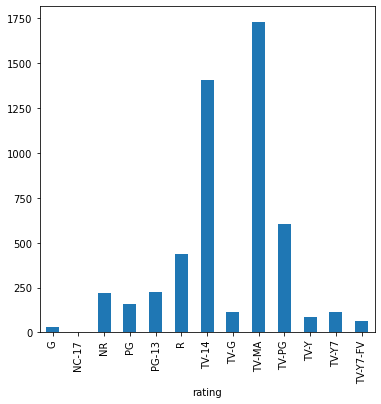

In [119]:
# Visualizing the distribution of rating
plt.figure(figsize=(6,6))
grouped_data.plot.bar()

### Method-2<br>

In [121]:
# Visualizing the distribution of rating
df['rating'].value_counts()

TV-MA       1731
TV-14       1406
TV-PG        602
R            439
PG-13        227
NR           218
PG           160
TV-G         115
TV-Y7        113
TV-Y          88
TV-Y7-FV      62
G             32
NC-17          2
Name: rating, dtype: int64

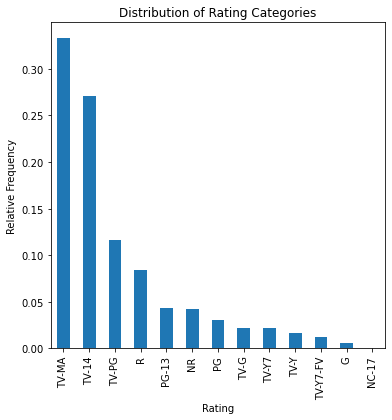

In [126]:
plt.figure(figsize=(6,6))
df['rating'].value_counts(normalize=True).plot.bar()
plt.title('Distribution of Rating Categories')
plt.xlabel('Rating')
plt.ylabel('Relative Frequency')
plt.show()

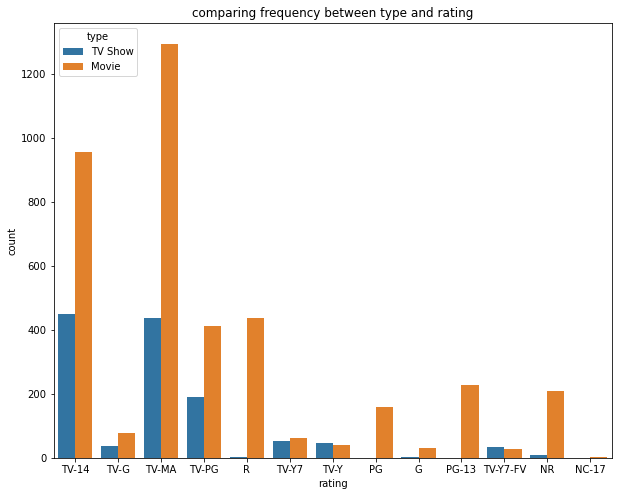

In [129]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=df)
plt.title('comparing frequency between type and rating')
plt.show()

## Now, let's see if Netflix focuses on TV-Shows rather than Movies in every year

In [131]:
df['type'].value_counts(normalize=True)

Movie      0.758037
TV Show    0.241963
Name: type, dtype: float64

 Movies are more in number in Netflix than TV-Shows<BR>

In [139]:
# now we will separate the year from the "date_added_cleaned" column using dt.year (accepts only datetime type as input)
# into a new column named 'year_added'

df['date_added_cleaned'] = pd.to_datetime(df['date_added_cleaned'])

df['year_added']=df['date_added_cleaned'].dt.year

df.head(3)

,title,director,cast,Number of Cast,country,date_added_cleaned,release_year,rating,duration,listed_in,description,type,year_added
0,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",8,South Korea,2019-11-30,2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,2019
1,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,1,NaN,2019-11-30,2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,2019
2,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",8,India,2019-11-30,2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,2019


In [147]:
# grouping 'type' attribute w.r to 'year_added'

df.groupby('year_added')['type'].value_counts(normalize=True)*100


year_added  type   
2008        Movie       50.000000
            TV Show     50.000000
2009        Movie      100.000000
2010        Movie      100.000000
2011        Movie      100.000000
2012        Movie       57.142857
            TV Show     42.857143
2013        Movie       66.666667
            TV Show     33.333333
2014        Movie      100.000000
2015        Movie       78.378378
            TV Show     21.621622
2016        Movie       64.077670
            TV Show     35.922330
2017        Movie       77.111486
            TV Show     22.888514
2018        Movie       79.189687
            TV Show     20.810313
2019        Movie       74.172545
            TV Show     25.827455
Name: type, dtype: float64

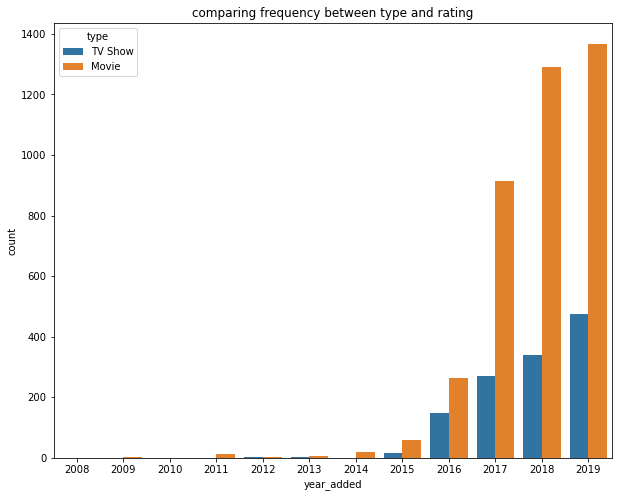

In [149]:
plt.figure(figsize=(10,8))
sns.countplot(x='year_added',hue='type',data=df)
plt.title('comparing frequency between type and rating')
plt.show()

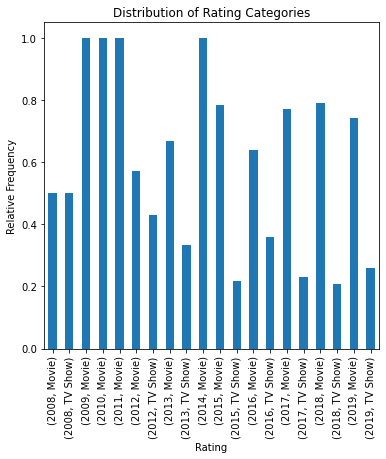

In [151]:
plt.figure(figsize=(6,6))
df.groupby('year_added')['type'].value_counts(normalize=True).plot.bar()
plt.title('Distribution of Rating Categories')
plt.xlabel('Rating')
plt.ylabel('Relative Frequency')
plt.show()

Every year Movies are most in number<br>

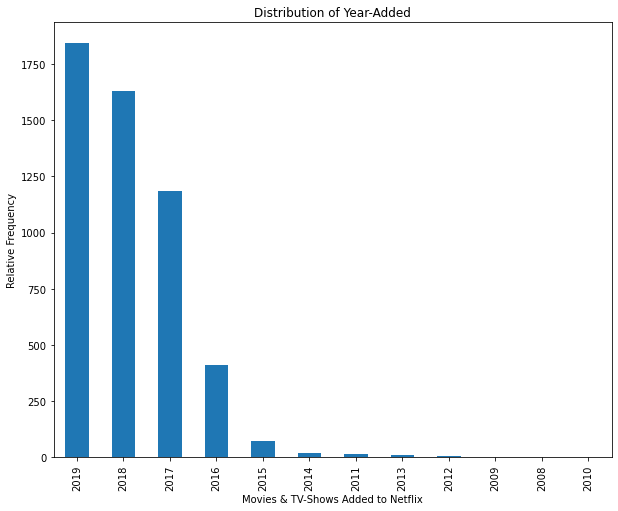

In [152]:
plt.figure(figsize=(10,8))
df['year_added'].value_counts().plot.bar()
plt.title('Distribution of Year-Added')
plt.ylabel('Relative Frequency')
plt.xlabel('Movies & TV-Shows Added to Netflix')
plt.show()

We could see that in the year 2019, most number of movies and TV-Shows are added to Netflix 